In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import json
import pickle
import mmcv
import utils
import numpy as np
import pandas as pd
import evaluation
import detection
import datasets
import visualization

In [2]:
name = "cm_rcnn_10164_inv"
filename = "eval_result.pkl"
cfg = './cfg/cm_rcnn_10164.py'
chp = '../work_dirs/cm_rcnn_10164_inv/epoch_12.pth'
output = '../detection/cm_rcnn_10164_inv/eval_result.json'
root = '../detection/cm_rcnn_10164_inv'
log_path = "../work_dirs/cm_rcnn_10164_inv/20190426_135837.log"

load_type = "test"
coco_types = ["bbox", "segm"]
voc_types = "bbox"
thresh = [0.5, 0.75]

In [3]:
coco_dataset, concrete = datasets.load_dataset(cfg, load_type)

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
Preparing dataset ......
[Dataset is ready now !]


In [4]:
data, _, _, _ = evaluation.detect_and_coco_eval(cfg, chp, filename, eval_type=coco_types,
                                                name=name, params=None)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 280/280, 9.4 task/s, elapsed: 30s, ETA:     0scm_rcnn_10164_inv detection datasets done!

Writing detected results to ../detection/cm_rcnn_10164_inv/eval_result.pkl
......
Writing done to pkl file: ../detection/cm_rcnn_10164_inv/eval_result.pkl

Writing formatted results to ../detection/cm_rcnn_10164_inv/eval_result.json
......
Writing done to json file: ../detection/cm_rcnn_10164_inv/eval_result.json

Starting evaluate bbox and segm ......
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.13s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.695
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.962
 Average Precision  (AP) @[ IoU=0.75      | are

In [5]:
gt, gt_num, det, det_num, class_id = evaluation.voc_ap_prepare(coco_dataset, image_ids=None,
                                                               class_names=None,
                                                               limit=None, types=voc_types, save=True)

targets = utils.voc_ap_compute(coco_dataset, class_id, gt, det, load=False,
                               class_names=None, types=voc_types, threshold=thresh)

Ready to formatting on *bbox* ...
[Building voc style GTS file......]
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 280/280, 75.5 task/s, elapsed: 4s, ETA:     0s
voc groundtruth file building done!
Gt(gt numbers: [289])file saved done in ../detection/cm_rcnn_10164_inv/bbox_gts.pkl

[Building voc style DETS file......]
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 962/962, 2205.1 task/s, elapsed: 0s, ETA:     0s
voc detection file building done!
Det(det numbers: [962])file saved done in ../detection/cm_rcnn_10164_inv/bbox_dets.pkl
Ready to evaluate on *bbox* ...

TP: (2, 962)
FP: (2, 962)
FPR: (2, 962)
TPR: (2, 962)
AREA: [0.99148092 0.98318802] (2,)
AP [0.96747728 0.83804898] (2,)
voc formatted file save done![../detection/cm_rcnn_10164_inv/voc_bbox_0.5_0.75.pkl]


(2, 964) <class 'numpy.ndarray'>
(2, 964) <class 'numpy.ndarray'>
(2,) <class 'numpy.ndarray'>
(2, 964) <class 'numpy.ndarray'>
(2, 964) <class 'numpy.ndarray'>
(2,) <class 'numpy.ndarray'>

Multiple pr lines
Save done![../detection/cm_rcnn_10164_inv/bbox_pr.png]


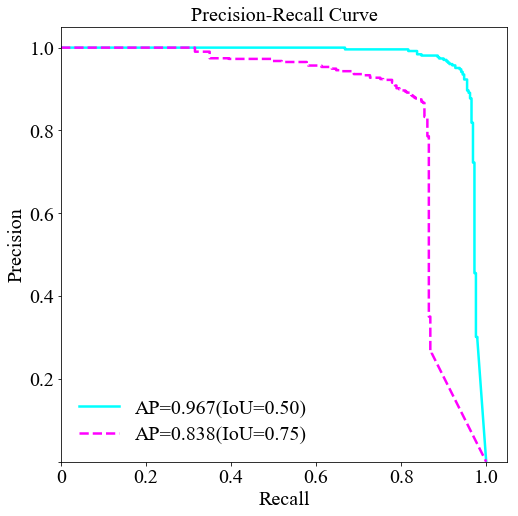


Multiple roc lines
Save done![../detection/cm_rcnn_10164_inv/bbox_roc.png]


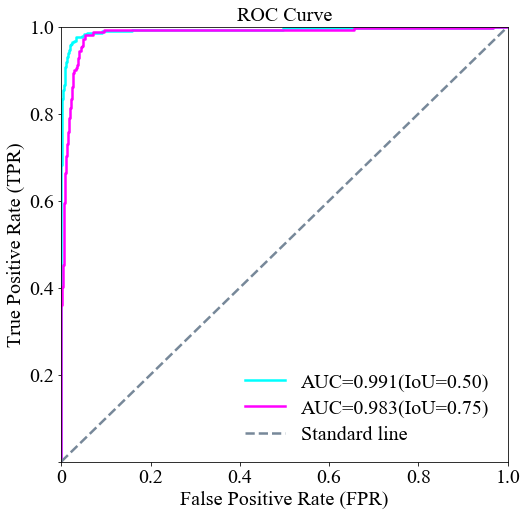

In [6]:
save = True

visualization.plot_voc_curve(targets, "crack", thresh, save=save, name=voc_types, root=root)

In [7]:
voc_types = "segm"

gt, gt_num, det, det_num, class_id = evaluation.voc_ap_prepare(coco_dataset, image_ids=None,
                                                               class_names=None,
                                                               limit=None, types=voc_types, save=True)

targets = utils.voc_ap_compute(coco_dataset, class_id, gt, det, load=False,
                               class_names=None, types=voc_types, threshold=thresh)

Ready to formatting on *segm* ...
[Building voc style GTS file......]
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 280/280, 79.5 task/s, elapsed: 4s, ETA:     0s
voc groundtruth file building done!
Gt(gt numbers: [289])file saved done in ../detection/cm_rcnn_10164_inv/segm_gts.pkl

[Building voc style DETS file......]
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 962/962, 1037.4 task/s, elapsed: 1s, ETA:     0s
voc detection file building done!
Det(det numbers: [962])file saved done in ../detection/cm_rcnn_10164_inv/segm_dets.pkl
Ready to evaluate on *segm* ...

TP: (2, 962)
FP: (2, 962)
FPR: (2, 962)
TPR: (2, 962)
AREA: [0.98300685 0.89611616] (2,)
AP [0.88532118 0.23924959] (2,)
voc formatted file save done![../detection/cm_rcnn_10164_inv/voc_segm_0.5_0.75.pkl]


(2, 964) <class 'numpy.ndarray'>
(2, 964) <class 'numpy.ndarray'>
(2,) <class 'numpy.ndarray'>
(2, 964) <class 'numpy.ndarray'>
(2, 964) <class 'numpy.ndarray'>
(2,) <class 'numpy.ndarray'>

Multiple pr lines
Save done![../detection/cm_rcnn_10164_inv/segm_pr.png]


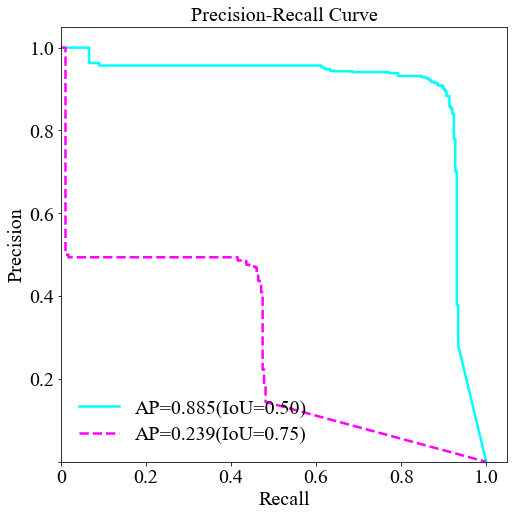


Multiple roc lines
Save done![../detection/cm_rcnn_10164_inv/segm_roc.png]


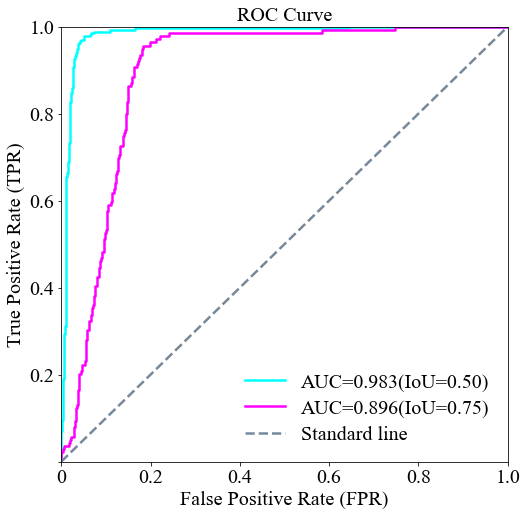

In [8]:
save = True

visualization.plot_voc_curve(targets, "crack", thresh, save=save, name=voc_types, root=root)

In [9]:
training = visualization.read_log(log_path)

In [10]:
training

{'name': 'cm_rcnn_10164_Inv',
 'epochs': 12,
 'iters': 700,
 'loss': [1.6167,
  0.7854,
  0.7562,
  0.6434,
  0.7337,
  0.6901,
  0.6012,
  0.6088,
  0.5361,
  0.6144,
  0.5792,
  0.5291,
  0.5634,
  0.5176,
  0.5471,
  0.5245,
  0.5139,
  0.5227,
  0.5435,
  0.5853,
  0.5222,
  0.4929,
  0.5497,
  0.514,
  0.5363,
  0.5016,
  0.5241,
  0.4996,
  0.5017,
  0.506,
  0.5255,
  0.5303,
  0.4746,
  0.5137,
  0.5153,
  0.4915,
  0.4872,
  0.4998,
  0.5136,
  0.4814,
  0.5129,
  0.4912,
  0.4716,
  0.4905,
  0.4951,
  0.4897,
  0.476,
  0.512,
  0.523,
  0.484,
  0.4746,
  0.4854,
  0.4662,
  0.4916,
  0.4888,
  0.4628,
  0.4996,
  0.4687,
  0.484,
  0.469,
  0.4336,
  0.4574,
  0.4776,
  0.4436,
  0.4451,
  0.4675,
  0.4636,
  0.4582,
  0.4609,
  0.4441,
  0.4271,
  0.4352,
  0.4575,
  0.4604,
  0.4461,
  0.4567,
  0.4367,
  0.4457,
  0.4236,
  0.442,
  0.4234,
  0.4473,
  0.4382,
  0.4264],
 'lr': [0.001,
  0.00117,
  0.00133,
  0.0015,
  0.00166,
  0.00183,
  0.002,
  0.00118,
  0.00127,


 Save done![../detection/cm_rcnn_10164_inv/learning_curve.png]


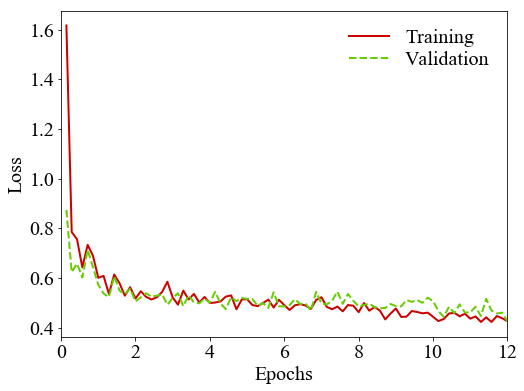

In [11]:
save_1 = True
path_1 = "../detection/cm_rcnn_10164_inv/learning_curve.png"

visualization.plot_training_curve(training, plot="loss", save=save_1, save_path=path_1)

 Save done![../detection/cm_rcnn_10164_inv/learing_rate.png]


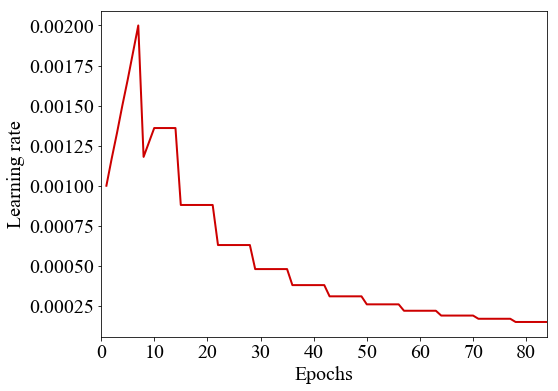

In [12]:
save_2 = True
path_2 = "../detection/cm_rcnn_10164_inv/learing_rate.png"

visualization.plot_training_curve(training, plot="lr", save=save_2, save_path=path_2)